In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import calendar

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
orders = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/olist_orders_dataset.csv")
order_payments = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/olist_order_payments_dataset.csv")
order_items = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/olist_order_items_dataset.csv")
products = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/olist_products_dataset.csv")
customers = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/olist_customers_dataset.csv")
geolocation = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/olist_geolocation_dataset.csv")
order_reviews = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/olist_order_reviews_dataset.csv")

# RFM.. 처음부터 다시 전처리

In [ ]:
customers

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [ ]:
orders.groupby('order_status').count()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
approved,2,2,2,2,0,0,2
canceled,625,625,625,484,75,6,625
created,5,5,5,0,0,0,5
delivered,96478,96478,96478,96464,96476,96470,96478
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
shipped,1107,1107,1107,1107,1107,0,1107
unavailable,609,609,609,609,0,0,609


In [ ]:
orders = orders[orders.order_status == 'delivered']

In [ ]:
orders.dropna(axis=0)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [ ]:
df_order_review = pd.merge(orders, order_reviews, on='order_id', how='inner')

In [ ]:
df_order_review

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08
96357,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01
96358,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57
96359,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56


In [ ]:
df_order_review_customer = pd.merge(df_order_review, customers, on='customer_id', how='inner')

In [ ]:
df_order_review_customer

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 13:02:51,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96356,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00,e262b3f92d1ce917aa412a9406cf61a6,5,NaN,NaN,2017-03-22 00:00:00,2017-03-23 11:02:08,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
96357,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01 00:00:00,2018-03-02 17:50:01,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
96358,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22 00:00:00,2017-09-22 23:10:57,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
96359,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26 00:00:00,2018-01-27 09:16:56,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [ ]:
df_final = pd.merge(order_payments, df_order_review_customer, on='order_id', how='inner')

In [ ]:
df_final

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100644,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12 00:00:00,9d099d7c7c6f2e00167890928d37c5c7,5,NaN,NaN,2018-05-23 00:00:00,2018-05-28 18:52:37,13f283df2f4760f22b57830865761d07,85869,foz do iguacu,PR
100645,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,9f402e937d15b4664948410079ab687d,5,NaN,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP
100646,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,f78d2909c6c202d3cabb8bac3fc00e75,5,NaN,NaN,2017-08-24 00:00:00,2017-08-25 19:38:31,53b30ca78efb2b7efcd3f9e461587eb2,30210,belo horizonte,MG
100647,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54,5d719b0d300663188169c6560e243f27,delivered,2018-08-07 23:26:13,2018-08-07 23:45:00,2018-08-09 11:46:00,2018-08-21 22:41:46,2018-08-24 00:00:00,6c698e5d193ab18db7615ea75a28866e,5,NaN,NaN,2018-08-22 00:00:00,2018-08-23 15:29:34,b84dc68f02f122a88d7e7bbd37b06204,22733,rio de janeiro,RJ


In [ ]:
df_final = pd.merge(df_final, order_items, on='order_id', how='inner')

In [ ]:
df_final

,order_id,payment_sequential,payment_type,payment_installments,payment_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,0a8556ac6be836b46b3e89920d59291c,delivered,2018-04-25 22:01:49,2018-04-25 22:15:09,2018-05-02 15:20:00,2018-05-09 17:36:51,2018-05-22 00:00:00,4ce650e117a5b292bf5ea980a61eb61e,1,Não recomendo,"Produto com qualidade ruim, amassado e descasc...",2018-05-10 00:00:00,2018-05-15 23:38:00,708ab75d2a007f0564aedd11139c7708,39801,teofilo otoni,MG,1,af74cc53dcffc8384b29e7abfa41902b,213b25e6f54661939f11710a6fddb871,2018-05-02 22:15:09,79.80,19.53
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,f2c7fc58a9de810828715166c672f10a,delivered,2018-06-26 11:01:38,2018-06-26 11:18:58,2018-06-28 14:18:00,2018-06-29 20:32:09,2018-07-16 00:00:00,ad2036caca61484fc435d7e673c020f2,5,NaN,NaN,2018-06-30 00:00:00,2018-07-03 11:23:16,a8b9d3a27068454b1c98cc67d4e31e6f,2422,sao paulo,SP,1,a630cc320a8c872f9de830cf121661a3,eaf6d55068dea77334e8477d3878d89e,2018-07-02 11:18:58,17.00,7.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,25b14b69de0b6e184ae6fe2755e478f9,delivered,2017-12-12 11:19:55,2017-12-14 09:52:34,2017-12-15 20:13:22,2017-12-18 17:24:41,2018-01-04 00:00:00,bcddfa0f7d2e54cfc74bae4f01b84d92,5,NaN,Aprovada,2017-12-19 00:00:00,2017-12-22 17:55:30,6f70c0b2f7552832ba46eb57b1c5651e,2652,sao paulo,SP,1,2028bf1b01cafb2d2b1901fca4083222,cc419e0650a3c5ba77189a1882b7556a,2017-12-26 09:52:34,56.99,8.72
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,c37a0e51e5df82bdb55d38ff0ffb6af3,5,NaN,NaN,2017-12-21 00:00:00,2017-12-21 21:42:31,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,7a5d8efaaa1081f800628c30d2b0728f,delivered,2017-12-06 12:04:06,2017-12-06 12:13:20,2017-12-07 20:28:28,2017-12-21 01:35:51,2018-01-04 00:00:00,5bc7680443b4ef765fec11a8201eeb0c,5,NaN,NaN,2017-12-21 00:00:00,2017-12-22 01:10:39,87695ed086ebd36f20404c82d20fca87,36060,juiz de fora,MG,1,548e5bfe28edceab6b51fa707cc9556f,da8622b14eb17ae2831f4ac5b9dab84a,2017-12-12 12:13:20,89.90,17.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114854,c45067032fd84f4cf408730ff5205568,1,credit_card,2,198.94,0fea3afc6a1510c9db75d349d28af974,delivered,2018-05-16 12:09:45,2018-05-16 12:39:20,2018-05-17 12:41:00,2018-05-22 17:28:28,2018-06-12 00:00:00,9d099d7c7c6f2e00167890928d37c5c7,5,NaN,NaN,2018-05-23 00:00:00,2018-05-28 18:52:37,13f283df2f4760f22b57830865761d07,85869,foz do iguacu,PR,1,fea2f92877b647dc07ea8e3f4aa2cf3f,406822777a0b9eb5c50e442dd4cd3ec5,2018-05-22 12:30:57,179.80,19.14
114855,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31,5d576cb2dfa3bc05612c392a1ee9c654,delivered,2018-03-08 16:57:23,2018-03-10 03:55:25,2018-03-12 18:19:36,2018-03-16 13:09:51,2018-04-04 00:00:00,9f402e937d15b4664948410079ab687d,5,NaN,Tudo certo!,2018-03-17 00:00:00,2018-03-20 15:17:08,b6027ac07fb76ebca8c97b1887865aee,12954,atibaia,SP,1,1302fd16bdfe85e523940c846370ef2c,a369d693961cb93b61ca2cc518872a85,2018-03-15 03:55:25,297.00,66.31
114856,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80,2079230c765a88530822a34a4cec2aa0,delivered,2017-08-18 09:45:35,2017-08-18 10:04:56,2017-08-18 18:04:24,2017-08-23 22:25:56,2017-09-12 00:00:00,f78d2909c6c202d3cabb8bac3fc00e75,5,NaN,NaN,2017-08

#RFM 구하기

In [ ]:
import datetime

In [ ]:
max_date = max(pd.to_datetime(df_final['order_purchase_timestamp'])) + datetime.timedelta(days=1)

In [ ]:
df_final['order_purchase_timestamp'] = pd.to_datetime(df_final['order_purchase_timestamp'])

In [ ]:
rfm_data = df_final.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
    'customer_id':'count',
    'price':'sum',
    'review_score': 'sum'
}).reset_index()

In [ ]:
rfm_data["review"] = rfm_data["review_score"] / rfm_data["customer_id"]

In [ ]:
rfm_data

,customer_unique_id,order_purchase_timestamp,customer_id,price,review_score,review
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,5,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,4.0
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,4,4.0
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,5,5.0
...,...,...,...,...,...,...
92749,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,10,5.0
92750,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,4,4.0
92751,ffff371b4d645b6ecea244b27531430a,568,1,89.90,5,5.0
92752,ffff5962728ec6157033ef9805bacc48,119,1,115.00,5,5.0


In [ ]:
rfm_data = rfm_data.drop('review_score', axis=1)

In [ ]:
import pandas as pd
import urllib
import json
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def k_means_group(data, n_clusters, random_state, asc=False, log_transf=False, standard_tranf=False):
    
    data_temp = data.copy()
    if log_transf:
        data_temp = np.log(data_temp) + 1
        
    if standard_tranf:
        scaler = StandardScaler()
        scaler = scaler.fit(data_temp)
        data_temp = scaler.transform(data_temp)
        
    kmeans_sel = KMeans(n_clusters=n_clusters, random_state=random_state).fit(data_temp)
    
    cluster_group = data.assign(cluster = kmeans_sel.labels_)
    
    mean_group = cluster_group.groupby('cluster').mean().reset_index()
    mean_group = mean_group.sort_values(by=mean_group.columns[1],ascending=asc)
    mean_group['cluster_set'] = [i for i in range(n_clusters, 0, -1) ]
    
    cluster_map = mean_group.set_index('cluster').to_dict()['cluster_set']
    
    return cluster_group['cluster'].map(cluster_map)

In [ ]:
r_labels = k_means_group(rfm_data[['order_purchase_timestamp']],5,1,asc=True)
f_labels = k_means_group(rfm_data[['customer_id']],5,1)
m_labels = k_means_group(rfm_data[['price']],5,1)

rfm_data = rfm_data.assign(R = r_labels, F = f_labels, M = m_labels) 

In [ ]:
rfm_data

,customer_unique_id,order_purchase_timestamp,customer_id,price,review,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,5.0,4,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4.0,4,1,1
2,0000f46a3911fa3c0805444483337064,537,1,69.00,3.0,1,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,4.0,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,5.0,3,1,2
...,...,...,...,...,...,...,...,...
92749,fffcf5a5ff07b0908bd4e2dbc735a684,447,2,1570.00,5.0,1,2,4
92750,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,4.0,3,1,1
92751,ffff371b4d645b6ecea244b27531430a,568,1,89.90,5.0,1,1,1
92752,ffff5962728ec6157033ef9805bacc48,119,1,115.00,5.0,4,1,1


In [ ]:
def get_segment(data):
    mean_fm = (data['F'] + data['M']) / 2
    
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 4 and mean_fm <= 5):
        return 'Champions'
    if (data['R'] >= 2 and data['R'] <= 5) and (mean_fm >= 3 and mean_fm <= 5):
        return 'Loyal Customers'
    if (data['R'] >= 3 and data['R'] <= 5) and (mean_fm >= 1 and mean_fm <= 3):
        return 'Potential Loyalist'
    if (data['R'] >= 4 and data['R'] <= 5) and (mean_fm >= 0 and mean_fm <= 1):
        return 'New Customers'
    if (data['R'] >= 3 and data['R'] <= 4) and (mean_fm >= 0 and mean_fm <= 1):
        return 'Promising'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 2 and mean_fm <= 3):
        return 'Customer Needing Attention'
    if (data['R'] >= 2 and data['R'] <= 3) and (mean_fm >= 0 and mean_fm <= 2):
        return 'About to Sleep'
    if (data['R'] >= 0 and data['R'] <= 2) and (mean_fm >= 2 and mean_fm <= 5):
        return 'At Risk'
    if (data['R'] >= 0 and data['R'] <= 1) and (mean_fm >= 4 and mean_fm <= 5):
        return "Can't Lose Then"
    if (data['R'] >= 1 and data['R'] <= 2) and (mean_fm >= 1 and mean_fm <= 2):
        return 'Hibernating'
    return 'Lost'

In [ ]:
rfm_data['segment'] = rfm_data.apply(get_segment,axis=1)

#RFM 시각화

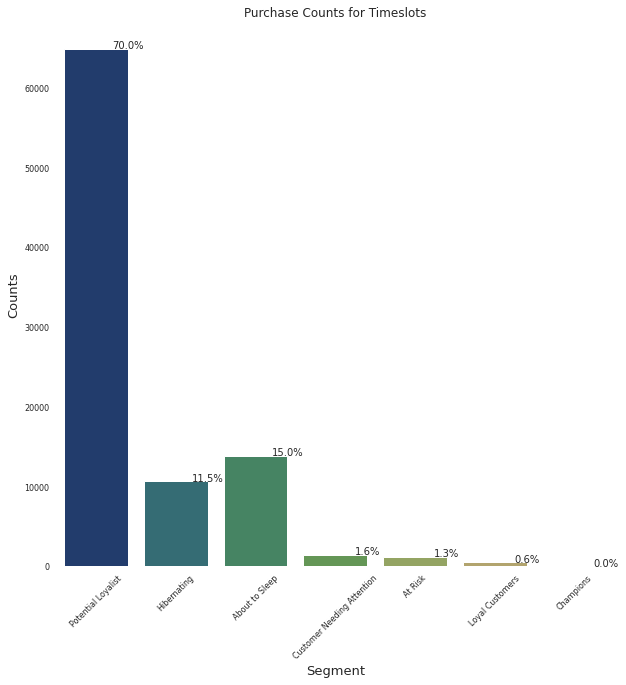

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('Purchase Counts for Timeslots', fontsize=12)
sns.set_style('white')
sns.countplot(x=rfm_data['segment'], data=rfm_data, palette='gist_earth')
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.xlabel('Segment', fontsize=13)
p=plt.ylabel('Counts', fontsize=13)
total = float(len(rfm_data['segment']))
plt.gca().spines['right'].set_visible(False) #오른쪽 테두리 제거
plt.gca().spines['top'].set_visible(False) #위 테두리 제거
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')

In [ ]:
df_RFM = rfm_data[rfm_data['segment'].isin(['Potential Loyalist', 'About to Sleep']) ]

In [ ]:
df_RFM.sort_values(by=['segment'], axis=0, ascending=False)

,customer_unique_id,order_purchase_timestamp,customer_id,price,review,R,F,M,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,5.0,4,1,1,Potential Loyalist
58738,a20e31007dda7d55afa58f6e3ca81173,74,1,49.00,5.0,5,1,1,Potential Loyalist
58748,a214e70576ced674f9ff61d283ab272e,185,1,157.49,5.0,4,1,1,Potential Loyalist
58747,a214b09bf06f0c3ae7f1b82be0344f24,232,1,9.90,3.0,3,1,1,Potential Loyalist
58746,a2138c9b24829fd5b7b4c21ac39be33e,259,1,245.90,4.0,3,1,2,Potential Loyalist
...,...,...,...,...,...,...,...,...,...
35609,61f1a493cb99e61ebb41924c15778a5c,424,1,19.99,5.0,2,1,1,About to Sleep
70821,c336f25b0edf2e872f0210e30b729b07,438,1,159.99,4.0,2,1,1,About to Sleep
74381,cd09d1be2d17afa5392b40eab3114377,326,1,52.64,5.0,2,1,1,About to Sleep
70823,c33bbfc16120d7a669d2f168e7d71157,318,3,123.00,4.0,2,2,1,About to Sleep


In [ ]:
df_RFM.rename(columns={'order_purchase_timestamp': 'recency', 'customer_id': 'frequency', 'price':'monetary'}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
df_RFM['review'] = df_RFM['review'].astype('int')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_rfm_new = df_RFM.iloc[:,[0,1,2,3,5,8]] 

In [ ]:
df_rfm_new

,customer_unique_id,recency,frequency,monetary,R,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,112,1,129.90,4,Potential Loyalist
1,0000b849f77a49e4a4ce2b2a4ca5be3f,115,1,18.90,4,Potential Loyalist
3,0000f6ccb0745a6a4b88665a16c9f078,321,1,25.99,2,About to Sleep
4,0004aac84e0df4da2b147fca70cf8255,288,1,180.00,3,Potential Loyalist
5,0004bd2a26a76fe21f786e4fbd80607f,146,1,154.00,4,Potential Loyalist
...,...,...,...,...,...,...
92746,fffa431dd3fcdefea4b1777d114144f2,303,1,64.99,3,Potential Loyalist
92747,fffb09418989a0dbff854a28163e47c6,255,1,58.00,3,Potential Loyalist
92748,fffbf87b7a1a6fa8b03f081c5f51a201,245,1,149.00,3,Potential Loyalist
92750,fffea47cd6d3cc0a88bd621562a9d061,262,1,64.89,3,Potential Loyalist


#RFM 세그먼트와 Review 데이터 합치기

In [ ]:
new_rfm = pd.merge(customers, df_rfm_new, on='customer_unique_id', how='inner')

In [ ]:
new_rfm2 = pd.merge(new_rfm, orders, on='customer_id', how='inner')

In [ ]:
new_rfm3 = pd.merge(new_rfm2, order_reviews, on='order_id', how='inner')

In [ ]:
new_rfm3

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,recency,frequency,monetary,R,segment,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,229,1,289.00,3,Potential Loyalist,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
1,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,102,1,139.94,4,Potential Loyalist,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
2,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,169,1,149.94,4,Potential Loyalist,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
3,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,32,1,230.00,5,Potential Loyalist,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
4,fd826e7cf63160e536e0908c76c3f441,addec96d2e059c80c30fe6871d30d177,4534,sao paulo,SP,192,1,14.99,4,Potential Loyalist,36e694cf4cbc2a4803200c35e84abdc4,delivered,2018-02-19 14:38:35,2018-02-19 14:50:37,2018-02-20 00:03:39,2018-02-20 16:25:51,2018-03-05 00:00:00,bc88d3b86fa8443d42894eb7b5f0d73c,5,NaN,NaN,2018-02-21 00:00:00,2018-02-26 13:53:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81328,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,144,1,74.90,4,Potential Loyalist,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04
81329,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,148,1,114.90,4,Potential Loyalist,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,b273b431c3aedb4eed18643309652940,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05
81330,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,143,1,37.00,4,Potential Loyalist,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07
81331,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,299,1,689.00,3,Potential Loyalist,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,0bcdc9e450ea500811a8d39ee993cd47,5,NaN,NaN,2017-11-17 00:00:00,2017-11-19 23:34:18


In [ ]:
pip install googletrans==4.0.0-rc1

In [ ]:
new_rfm3 = new_rfm3.dropna(axis=0, subset=['review_comment_title'])

In [ ]:
df_rfm_new4 = new_rfm3.iloc[:,[1,9,18,19,20]] 

In [ ]:
df_rfm_new4 = df_rfm_new4.sort_values(by="segment", ascending = False)

In [ ]:
df_rfm_new4

,customer_unique_id,segment,review_score,review_comment_title,review_comment_message
3,345ecd01c38d18a9036ed96c73b8d066,Potential Loyalist,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon
54427,339226381a666aaee8cda05d4ba45312,Potential Loyalist,1,Quantidade errada,Dia 06/06/2018 efetuei a compra de 2 capas cas...
54389,ca0e20ade97bc751496dfc450afe397b,Potential Loyalist,5,BOA,"COMPREI ITENS DO MAR DAS FILIPINAS, E GOSTEI M..."
54395,48046c78660dbe0874a8403f43c65f9e,Potential Loyalist,3,Medio,A cortina e meio fraquinha..em questão de qual...
54403,dfaedec84cf126e85337adcc7eb36b36,Potential Loyalist,1,Arrependimento,Não deveria ter comprado
...,...,...,...,...,...
26847,c7fa006dc114bb846a9467bc0199f346,Potential Loyalist,3,Entrega atrasou,A entrega foi dividida em duas. Não houve comu...
26876,f120fc6d61289eefb3f39aac12abb022,Potential Loyalist,5,10,Entrega muito rapida
36947,432ee7edf0be5950fe2bc6409d3af9b7,About to Sleep,1,A câmera não funcionou,Câmera não funcionou
76867,865c77590abaa77db865e2a2313ffc31,About to Sleep,5,Muito bom.,NaN


In [ ]:
df_rfm_new5 = df_rfm_new4[df_rfm_new4["review_score"] < 3]

In [ ]:
df_rfm_new5

,customer_unique_id,segment,review_score,review_comment_title,review_comment_message
54427,339226381a666aaee8cda05d4ba45312,Potential Loyalist,1,Quantidade errada,Dia 06/06/2018 efetuei a compra de 2 capas cas...
54403,dfaedec84cf126e85337adcc7eb36b36,Potential Loyalist,1,Arrependimento,Não deveria ter comprado
54428,1a1620a23a766782c7c5c5d29a362f5f,Potential Loyalist,2,Diferente,Carregador diferente do que está na foto e é p...
54363,129a2123eaeed37487cf969f38fa4de2,Potential Loyalist,2,desapontada,Estava muito ansiosa pelo produto. Expectativa...
54299,81133c6f891edaf2cd1193b262ab2ba7,Potential Loyalist,1,nao recomendo,o produto não correspondeu as minhas expectati...
...,...,...,...,...,...
26795,b03155da610163a1626f1b99d4787774,Potential Loyalist,1,nota 10,vocês e muito pontual
26821,e380b7dea2cb0665852a123ae720515a,Potential Loyalist,1,Nao recebi o produto,Espero ainda receber o produto🙏🏻
26823,b54b13cce83ca86d625ecbc262855775,Potential Loyalist,1,Produto defeituoso,"Quando fiz a compra, solicitei o cancelamento ..."
26843,203c37755ceffec3ec8618c4057b0334,Potential Loyalist,1,paguei 2 e recebi 1,Comprei 2 remedios e me entregaram apenas o1. ...


#Review 번역하기

In [ ]:
import pandas as pd
from googletrans import Translator

In [ ]:
translator = Translator()
result = translator.translate('안녕하세요.', dest="ja")
print(result.text)

こんにちは。


In [ ]:
df_rfm_new5["review_comment_title_en"] = df_rfm_new5['review_comment_title'].apply(lambda x: translator.translate(x, dest='en').text)

AttributeError: ignored

In [ ]:
df_rfm_new5

In [ ]:
df_rfm_new5["review_comment_contents_en"] = df_rfm_new5['review_comment_message'].apply(lambda x: translator.translate(x, dest='en').text)

In [ ]:
df_rfm_new5.to_csv("/content/gdrive/My Drive/Colab Notebooks/df_rfm_new_review.csv")